In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
"""From 'Unitary bounds of astrophysical neutrinos' DOI 10.1103/PhysRevD.98.123023"""
import sys
sys.path.extend(['.', '..'])

import numpy as np
import matplotlib as mpl
from matplotlib import rc
rc('text', usetex='True')
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Rectangle, Wedge
from matplotlib.legend_handler import HandlerPatch
plt.style.use('./paper.mplstyle')

mpl.rcParams['text.latex.preamble'] = [
    r'\usepackage{amsmath}',
    r'\usepackage{amssymb}',
    r'\usepackage{accents}',
    r'\DeclareSymbolFont{matha}{OML}{txmi}{m}{it}',
    r'\DeclareMathSymbol{\nu}{\mathord}{matha}{118}']
mpl.rcParams['text.latex.unicode'] = True

import warnings
with warnings.catch_warnings():
    import ternary

    warnings.simplefilter("ignore")
    from utils import fr as fr_utils
    from utils import plot as plot_utils

tRed = np.array([226,101,95]) / 255.
tBlue = np.array([96,149,201]) / 255.
tGreen = np.array([170,196,109]) / 255.

In [3]:
f_s = fr_utils.normalise_fr((1, 4, 0))

In [4]:
def Sp(x, y, z):
    if np.power(x, 2) < (np.power(y - z, 2) / 9.):
        return -1
    num = np.power(3*x + y + z, 2) - (4 * y * z)
    den = 24 * x
    return num / den

In [5]:
S1 = lambda x, y, z: (x + y + z) / 3.
S2 = lambda x, y, z: [x/2., y/2., z/2.]
S3 = lambda x, y, z: [Sp(x, y, z), Sp(y, z, x), Sp(z, x, y)]

B_v = np.vectorize(lambda x, y, z: max([0] + [S1(x, y, z)] + S2(x, y, z) + S3(x, y, z)))

In [6]:
n_om = 1000
n_chi = 1000

omega = np.linspace(-np.pi, np.pi, n_om)
chi = np.linspace(-np.pi, np.pi, n_chi)

In [7]:
x = (1 - f_s[0] - 2*f_s[1]) * np.sin(omega)
y = (1 - 2*f_s[0] - f_s[1]) * np.cos(omega)
z = (f_s[1] - f_s[0]) * (np.cos(omega) - np.sin(omega))

In [8]:
B = B_v(x, y, z)

In [9]:
def Eb(B, omega, chi):
    if np.abs(chi - omega) >= (np.pi / 2.):
        return 1
    return B / np.cos(chi - omega)

eta = np.zeros_like(chi)
for i_chi in xrange(n_chi):
    nB = []
    for i_ome in xrange(n_om):
        nB.append(Eb(B[i_ome], omega[i_ome], chi[i_chi]))
    eta[i_chi] = np.min(nB)

df_em = eta * np.cos(chi)
df_um = eta * np.sin(chi)

In [10]:
af_m = np.dstack([
    df_em + f_s[0],
    df_um + f_s[1],
    1 - ((df_em + f_s[0]) - (df_um + f_s[1]))
])[0]

In [11]:
nbins = 25
fontsize = 23

/home/shivesh/programs/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family [u'serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


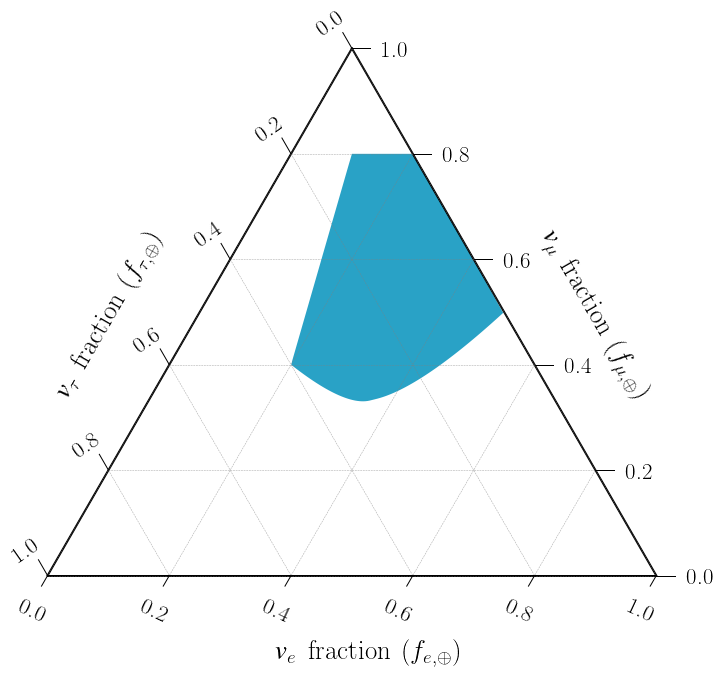

In [12]:
# Figure
fig = plt.figure(figsize=(12, 12))

# Axis
ax = fig.add_subplot(111)
#ax_labels = [r'$f_{e,\oplus}$', r'$f_{\mu,\oplus}$', r'$f_{\tau,\oplus}$']
ax_labels = [r'$\nu_e\:\:{\rm fraction}\:\left( f_{e,\oplus}\right)$',
             r'$\nu_\mu\:\:{\rm fraction}\:\left( f_{\mu,\oplus}\right)$',
             r'$\nu_\tau\:\:{\rm fraction}\:\left( f_{\tau,\oplus}\right)$']
tax = plot_utils.get_tax(ax, scale=nbins, ax_labels=ax_labels, rot_ax_labels=True)

def project(p):
    """Convert from flavour to cartesian."""
    a, b, c = p
    x = a + b/2.
    y = b * np.sqrt(3)/2.
    return [x, y]

pol = np.array(map(project, af_m))
ax.fill(pol.T[0]*nbins, pol.T[1]*nbins)

# Legend
# l_size = fontsize
# legend = plt.legend(loc=(0.7, 0.75), title=r'Source composition',
#                     fontsize=l_size, prop={'size': fontsize})
# plt.setp(legend.get_title(), fontsize=l_size)
# ax.add_artist(legend)

#fig.savefig('./plots/unitarity.pdf', bbox_inches='tight', dpi=150)